In [1]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [2]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'
!ls -ltr {folder}

total 49168
-rw-rw-r-- 1 dsc dsc     1695 oct 19 16:58 00_work_line_notes.txt
-rw-rw-r-- 1 dsc dsc   309961 oct 20 11:55 01_ciclo_prueba_muestra.ipynb
-rw-rw-r-- 1 dsc dsc   337332 oct 23 16:39 02_ciclo_prueba_muestra_ordenado.ipynb
drwxrwxr-x 2 dsc dsc     4096 oct 23 16:56 csv_files
-rw-rw-r-- 1 dsc dsc    26352 oct 29 18:05 residuo.png
-rw-rw-r-- 1 dsc dsc    28090 oct 29 18:05 estacionalidad.png
-rw-rw-r-- 1 dsc dsc    16061 oct 29 18:05 tendencia.png
-rw-rw-r-- 1 dsc dsc    36481 oct 29 18:06 todo.png
-rw-rw-r-- 1 dsc dsc    28121 oct 29 18:37 residuo_nube.png
-rw-rw-r-- 1 dsc dsc    16512 oct 29 18:38 estacionalidad_nube.png
-rw-rw-r-- 1 dsc dsc    28910 oct 29 18:38 tendencia_nube.png
-rw-rw-r-- 1 dsc dsc    48129 oct 29 18:38 todo_nube.png
-rw-rw-r-- 1 dsc dsc  2403149 nov  3 18:08 04_ciclo_prueba_muestra_serie_temporal_lio.ipynb
-rw-rw-r-- 1 dsc dsc  1919420 nov  9 12:25 04_ciclo_prueba_muestra_serie_temporal.ipynb
-rw-rw-r-- 1 dsc dsc  1741628 nov 16 17:12 serie_completa.csv


In [3]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [4]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [5]:
!ls -ltr datos_accs_madrid.csv

-rw-rw-r-- 1 dsc dsc 24017454 nov 16 18:37 datos_accs_madrid.csv


In [6]:
import pandas as pd
df_accs = pd.read_csv("datos_accs_madrid.csv")

In [7]:
# Cargara librerias y paquetes

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [8]:
# Análisis Exploratorio Inicial
# Ahora veamos cuantas columnas y registros tenemos:
df_accs.shape

(252998, 11)

In [9]:
df_accs.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [10]:
df_accs.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [11]:
# Borramos variables innecesarias
drop_elements = ['FECHA', 'NUM_PERSONAS', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'LESIVIDAD']
df_accs = df_accs.drop(drop_elements, axis = 1)

In [12]:
# algunas visualizaciones para comprender mejor los datos.
# Mirar balanceo de etiquetas

In [13]:
# Comprobar valores nulos
df_accs.isnull().sum()

HORA          0
DIA_SEMANA    0
DISTRITO      0
SEXO          0
EDAD_APROX    0
dtype: int64

In [14]:
df_accs.groupby('HORA').size()

HORA
00:00     4729
01:00     3602
02:00     2776
03:00     2431
04:00     2131
05:00     2225
06:00     3992
07:00     6428
08:00    11759
09:00    14348
10:00    11561
11:00    12492
12:00    14473
13:00    15921
14:00    18232
15:00    14557
16:00    13590
17:00    14137
18:00    16259
19:00    18049
20:00    17244
21:00    14113
22:00    10758
23:00     7191
dtype: int64

In [15]:
df_accs.groupby('DIA_SEMANA').size()

DIA_SEMANA
DOMINGO      27249
JUEVES       38794
LUNES        36301
MARTES       37707
MIERCOLES    38697
SABADO       30798
VIERNES      43452
dtype: int64

In [16]:
df_accs.groupby('DISTRITO').size()

DISTRITO
ARGANZUELA             13050
BARAJAS                 3402
CARABANCHEL            15593
CENTRO                 17717
CHAMARTIN              18857
CHAMBERI               14466
CIUDAD LINEAL          16580
FUENCARRAL-EL PARDO    13750
HORTALEZA               8546
LATINA                 12218
MONCLOA-ARAVACA        13587
MORATALAZ               6246
PUENTE DE VALLECAS     16180
RETIRO                 13665
SALAMANCA              19269
SAN BLAS               11987
TETUAN                 13626
USERA                   8808
VICALVARO               3142
VILLA DE VALLECAS       5601
VILLAVERDE              6708
dtype: int64

In [17]:
df_accs.groupby('SEXO').size()

SEXO
HOMBRE         160165
MUJER           80717
NO_ASIGNADO     12116
dtype: int64

In [18]:
df_accs.groupby('EDAD_APROX').size()

EDAD_APROX
0               3128
10              5124
15              2593
20              9304
25             49329
30             31110
35             30169
40             26421
45             22167
50             17999
55             12454
65             13459
70              3656
75              6361
NO_ASIGNADO    19724
dtype: int64

In [19]:
# Veamos cuántos registros hay según DIA_SEMANA, como variable central:

In [20]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

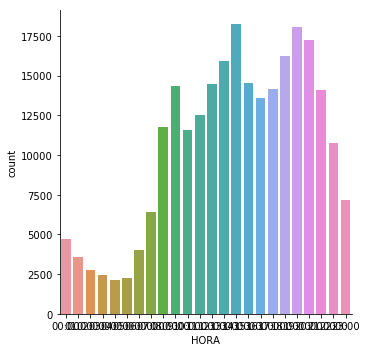

In [21]:
sb.catplot('HORA',data=df_accs,kind="count", \
           order=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', \
                  '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', \
                  '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', \
                  '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
          )

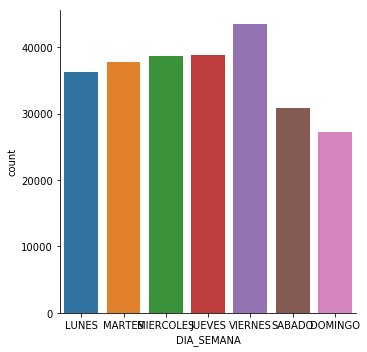

In [22]:
sb.catplot('DIA_SEMANA',data=df_accs,kind="count", \
           order=['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']
          )

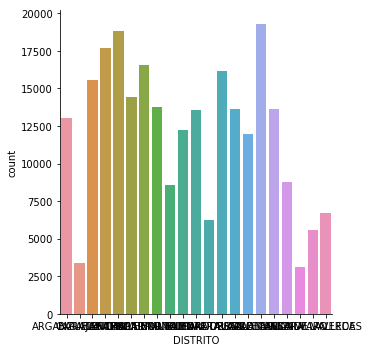

In [23]:
sb.catplot('DISTRITO',data=df_accs,kind="count", \
           order = ['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN', \
                    'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA', \
                    'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS', \
                    'RETIRO', 'SAN BLAS', 'SALAMANCA', 'TETUAN', 'USERA', 'VICALVARO', \
                    'VILLA DE VALLECAS', 'VILLAVERDE']
          )

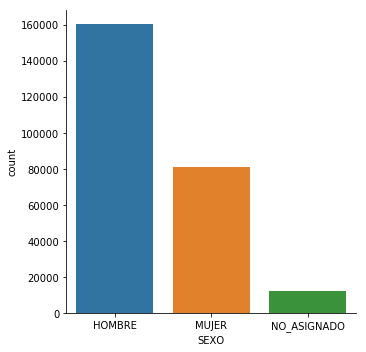

In [24]:
sb.catplot('SEXO',data=df_accs,kind="count", \
           order = ['HOMBRE', 'MUJER', 'NO_ASIGNADO']
          )

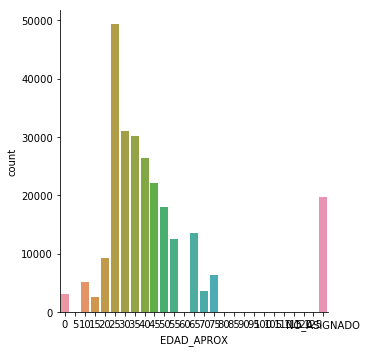

In [25]:
sb.catplot('EDAD_APROX',data=df_accs,kind="count", \
           order = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', \
                    '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', \
                    '105', '110', '115', '120', '125', 'NO_ASIGNADO']
          )

In [26]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

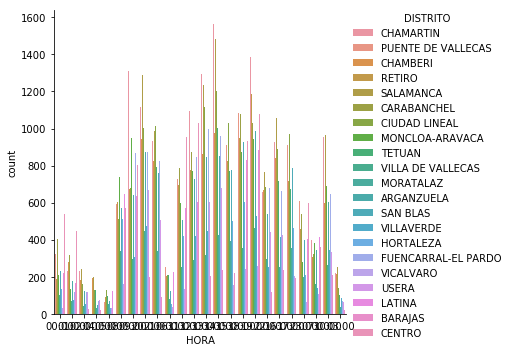

In [27]:
sb.catplot('HORA',data=df_accs,hue='DISTRITO',kind="count")

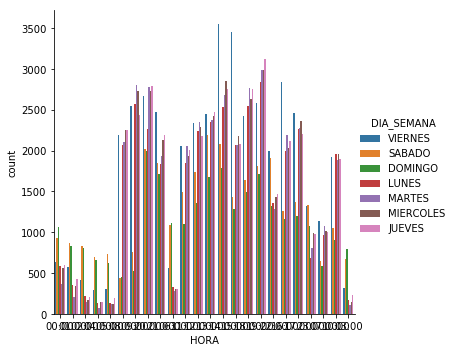

In [28]:
sb.catplot('HORA',data=df_accs,hue='DIA_SEMANA',kind="count")

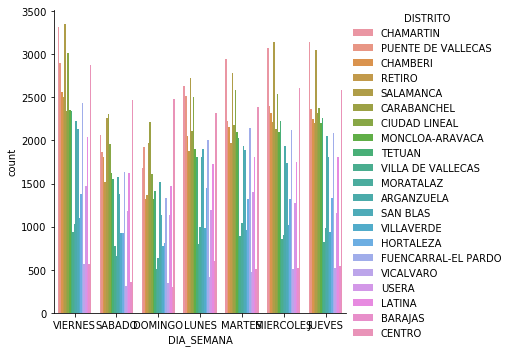

In [29]:
sb.catplot('DIA_SEMANA',data=df_accs,hue='DISTRITO',kind="count")

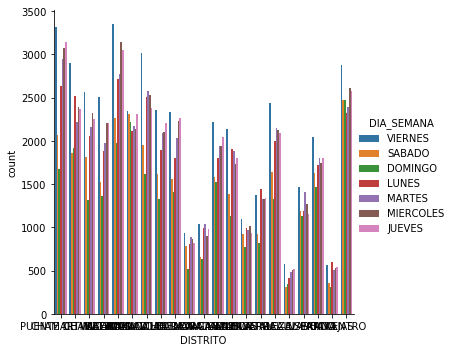

In [30]:
sb.catplot('DISTRITO',data=df_accs,hue='DIA_SEMANA',kind="count")

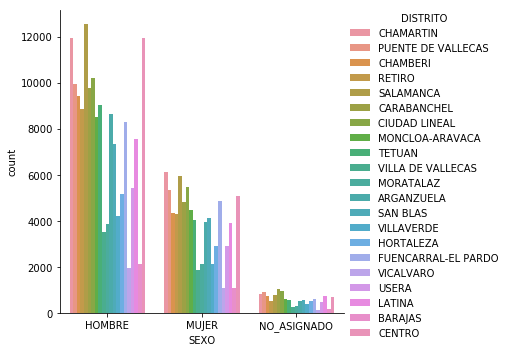

In [31]:
sb.catplot('SEXO',data=df_accs,hue='DISTRITO',kind="count")

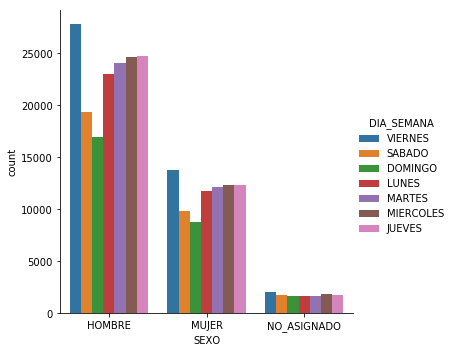

In [32]:
sb.catplot('SEXO',data=df_accs,hue='DIA_SEMANA',kind="count")

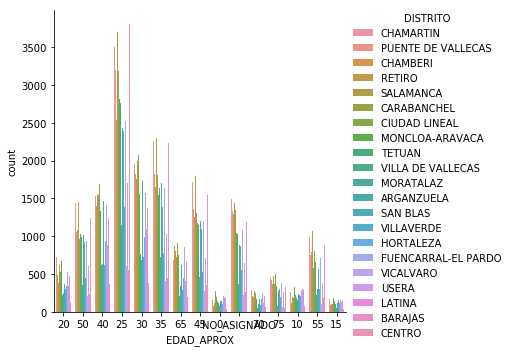

In [33]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DISTRITO',kind="count")

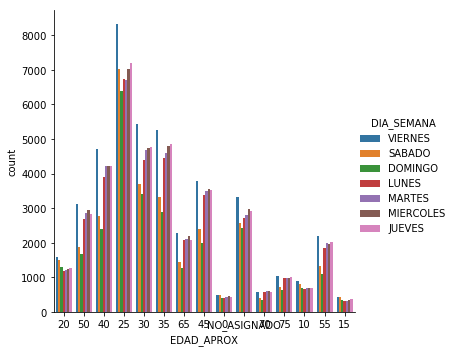

In [34]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DIA_SEMANA',kind="count")

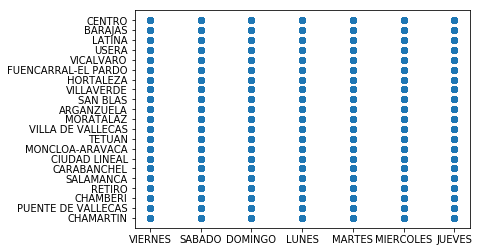

In [35]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['DISTRITO'].values)
plt.show()

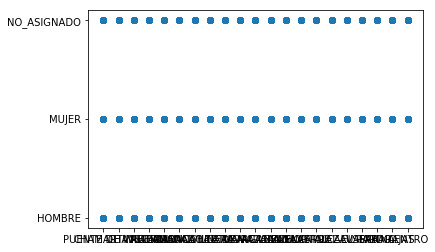

In [36]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['SEXO'].values)
plt.show()

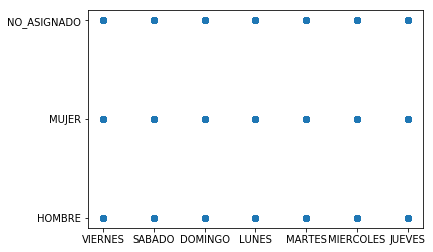

In [37]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['SEXO'].values)
plt.show()

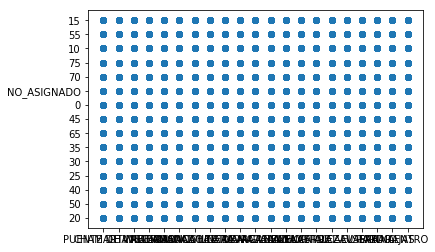

In [38]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['EDAD_APROX'].values)
plt.show()

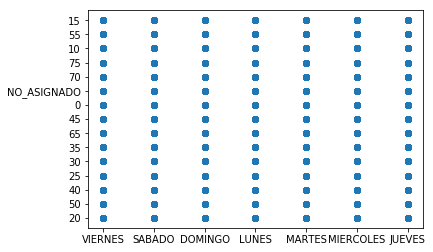

In [39]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['EDAD_APROX'].values)
plt.show()

In [40]:
# Mapeo de datos

In [41]:
#Filtro: Columnas que empiezan por xxx
#filtro_borrar = [col for col in df_accs if col.startswith('NUM_PERS')]
# borrar columnas sobrantes:
#df_accs = df_accs.drop(columns=filtro_borrar)

In [42]:
df_accs_lab_ohe = df_accs.reset_index(drop=True).copy()

In [43]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [44]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [45]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [46]:
df_accs_lab_ohe.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [47]:
df_accs.dtypes

HORA          object
DIA_SEMANA    object
DISTRITO      object
SEXO          object
EDAD_APROX    object
dtype: object

In [48]:
df_accs_lab_ohe.dtypes

HORA          object
DIA_SEMANA    object
DISTRITO      object
SEXO          object
EDAD_APROX    object
dtype: object

In [49]:
df_accs_lab_ohe.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20
1,00:00,VIERNES,CHAMARTIN,HOMBRE,50
2,00:00,VIERNES,CHAMARTIN,MUJER,40


In [50]:
df_accs_lab_ohe['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [51]:
# Comprobar valores nulos
df_accs_lab_ohe.isnull().sum()

HORA          0
DIA_SEMANA    0
DISTRITO      0
SEXO          0
EDAD_APROX    0
dtype: int64

In [52]:
df_accs_lab_ohe_sample = df_accs_lab_ohe.sample(n=10000).reset_index(drop=True)

In [53]:
df_accs_lab_ohe_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [54]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,11:00,VIERNES,CHAMARTIN,HOMBRE,50


In [55]:
df_accs_lab_ohe_sample.dtypes

HORA          object
DIA_SEMANA    object
DISTRITO      object
SEXO          object
EDAD_APROX    object
dtype: object

In [56]:
df_accs_dumm_sample = pd.get_dummies(df_accs_lab_ohe_sample, drop_first=True)

In [57]:
df_accs_dumm_sample.shape

(10000, 65)

In [58]:
df_accs_dumm_sample.head(1)

,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,HORA_10:00,...,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
# Comprobar valores nulos
df_accs_lab_ohe_sample.isnull().sum()

HORA          0
DIA_SEMANA    0
DISTRITO      0
SEXO          0
EDAD_APROX    0
dtype: int64

In [60]:
# Comprobar valores nulos
df_accs_dumm_sample.isnull().sum()

HORA_01:00                0
HORA_02:00                0
HORA_03:00                0
HORA_04:00                0
HORA_05:00                0
                         ..
EDAD_APROX_55             0
EDAD_APROX_65             0
EDAD_APROX_70             0
EDAD_APROX_75             0
EDAD_APROX_NO_ASIGNADO    0
Length: 65, dtype: int64

In [61]:
# No limitar display de columnas
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(df_accs_dumm_sample.head(1))

,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,HORA_10:00,HORA_11:00,HORA_12:00,HORA_13:00,HORA_14:00,HORA_15:00,HORA_16:00,HORA_17:00,HORA_18:00,HORA_19:00,HORA_20:00,HORA_21:00,HORA_22:00,HORA_23:00,DIA_SEMANA_JUEVES,DIA_SEMANA_LUNES,DIA_SEMANA_MARTES,DIA_SEMANA_MIERCOLES,DIA_SEMANA_SABADO,DIA_SEMANA_VIERNES,DISTRITO_BARAJAS,DISTRITO_CARABANCHEL,DISTRITO_CENTRO,DISTRITO_CHAMARTIN,DISTRITO_CHAMBERI,DISTRITO_CIUDAD LINEAL,DISTRITO_FUENCARRAL-EL PARDO,DISTRITO_HORTALEZA,DISTRITO_LATINA,DISTRITO_MONCLOA-ARAVACA,DISTRITO_MORATALAZ,DISTRITO_PUENTE DE VALLECAS,DISTRITO_RETIRO,DISTRITO_SALAMANCA,DISTRITO_SAN BLAS,DISTRITO_TETUAN,DISTRITO_USERA,DISTRITO_VICALVARO,DISTRITO_VILLA DE VALLECAS,DISTRITO_VILLAVERDE,SEXO_MUJER,SEXO_NO_ASIGNADO,EDAD_APROX_10,EDAD_APROX_15,EDAD_APROX_20,EDAD_APROX_25,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [62]:
display(df_accs_dumm_sample.columns)

Index(['HORA_01:00', 'HORA_02:00', 'HORA_03:00', 'HORA_04:00', 'HORA_05:00',
       'HORA_06:00', 'HORA_07:00', 'HORA_08:00', 'HORA_09:00', 'HORA_10:00',
       'HORA_11:00', 'HORA_12:00', 'HORA_13:00', 'HORA_14:00', 'HORA_15:00',
       'HORA_16:00', 'HORA_17:00', 'HORA_18:00', 'HORA_19:00', 'HORA_20:00',
       'HORA_21:00', 'HORA_22:00', 'HORA_23:00', 'DIA_SEMANA_JUEVES',
       'DIA_SEMANA_LUNES', 'DIA_SEMANA_MARTES', 'DIA_SEMANA_MIERCOLES',
       'DIA_SEMANA_SABADO', 'DIA_SEMANA_VIERNES', 'DISTRITO_BARAJAS',
       'DISTRITO_CARABANCHEL', 'DISTRITO_CENTRO', 'DISTRITO_CHAMARTIN',
       'DISTRITO_CHAMBERI', 'DISTRITO_CIUDAD LINEAL',
       'DISTRITO_FUENCARRAL-EL PARDO', 'DISTRITO_HORTALEZA', 'DISTRITO_LATINA',
       'DISTRITO_MONCLOA-ARAVACA', 'DISTRITO_MORATALAZ',
       'DISTRITO_PUENTE DE VALLECAS', 'DISTRITO_RETIRO', 'DISTRITO_SALAMANCA',
       'DISTRITO_SAN BLAS', 'DISTRITO_TETUAN', 'DISTRITO_USERA',
       'DISTRITO_VICALVARO', 'DISTRITO_VILLA DE VALLECAS',
       'DISTRI

In [209]:
print(pd.options.display.max_columns)

None


In [64]:
print(pd.options.display.max_rows)

60


In [65]:
df_accs_lab_ohe_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [66]:
df_accs_lab_ohe_sample[0:1]

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,11:00,VIERNES,CHAMARTIN,HOMBRE,50


# Data Preparation

In [67]:
# Cargamos variables con datos de muestra
X = np.array(df_accs_lab_ohe_sample.drop('DISTRITO', 1))
y = np.array(df_accs_lab_ohe_sample["DISTRITO"])
X.shape

(10000, 4)

In [68]:
df_accs_lab_ohe_sample.dtypes

HORA          object
DIA_SEMANA    object
DISTRITO      object
SEXO          object
EDAD_APROX    object
dtype: object

In [69]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [72]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [73]:
X.shape

(10000, 4)

In [74]:
X_train.shape

(8000, 49)

In [75]:
X_test.shape

(2000, 49)

In [76]:
X[0]

array(['11:00', 'VIERNES', 'HOMBRE', '50'], dtype=object)

In [77]:
X_train[0]

<1x49 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [78]:
X_test[0]

<1x49 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [79]:
df_accs_lab_ohe_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,11:00,VIERNES,CHAMARTIN,HOMBRE,50
1,03:00,MIERCOLES,USERA,HOMBRE,35
2,22:00,JUEVES,CENTRO,MUJER,NO_ASIGNADO


In [80]:
df_accs_lab_sample = df_accs_lab_ohe_sample.reset_index(drop=True)

In [81]:
df_accs_lab_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,11:00,VIERNES,CHAMARTIN,HOMBRE,50
1,03:00,MIERCOLES,USERA,HOMBRE,35
2,22:00,JUEVES,CENTRO,MUJER,NO_ASIGNADO


In [82]:
# Etiquetamos mediante Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [83]:
df_accs_lab_sample['HORA']= lab.fit_transform(df_accs_lab_sample['HORA'])
df_accs_lab_sample['DIA_SEMANA']= lab.fit_transform(df_accs_lab_sample['DIA_SEMANA'])
df_accs_lab_sample['DISTRITO']= lab.fit_transform(df_accs_lab_sample['DISTRITO'])
df_accs_lab_sample['SEXO']= lab.fit_transform(df_accs_lab_sample['SEXO'])
df_accs_lab_sample['EDAD_APROX']= lab.fit_transform(df_accs_lab_sample['EDAD_APROX'])

In [84]:
df_accs_lab_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,11,6,4,0,9
1,3,4,17,0,6
2,22,1,3,1,14


In [85]:
# Nuestra clase target será DISTRITO

In [86]:
df_accs_lab_sample.dtypes

HORA          int64
DIA_SEMANA    int64
DISTRITO      int64
SEXO          int64
EDAD_APROX    int64
dtype: object

In [87]:
df_accs_lab_ohe_sample['DISTRITO']= lab.fit_transform(df_accs_lab_ohe_sample['DISTRITO'])

In [88]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [89]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [90]:
df_accs_dumm_sample.head(1)

,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,HORA_10:00,HORA_11:00,HORA_12:00,HORA_13:00,HORA_14:00,HORA_15:00,HORA_16:00,HORA_17:00,HORA_18:00,HORA_19:00,HORA_20:00,HORA_21:00,HORA_22:00,HORA_23:00,DIA_SEMANA_JUEVES,DIA_SEMANA_LUNES,DIA_SEMANA_MARTES,DIA_SEMANA_MIERCOLES,DIA_SEMANA_SABADO,DIA_SEMANA_VIERNES,DISTRITO_BARAJAS,DISTRITO_CARABANCHEL,DISTRITO_CENTRO,DISTRITO_CHAMARTIN,DISTRITO_CHAMBERI,DISTRITO_CIUDAD LINEAL,DISTRITO_FUENCARRAL-EL PARDO,DISTRITO_HORTALEZA,DISTRITO_LATINA,DISTRITO_MONCLOA-ARAVACA,DISTRITO_MORATALAZ,DISTRITO_PUENTE DE VALLECAS,DISTRITO_RETIRO,DISTRITO_SALAMANCA,DISTRITO_SAN BLAS,DISTRITO_TETUAN,DISTRITO_USERA,DISTRITO_VICALVARO,DISTRITO_VILLA DE VALLECAS,DISTRITO_VILLAVERDE,SEXO_MUJER,SEXO_NO_ASIGNADO,EDAD_APROX_10,EDAD_APROX_15,EDAD_APROX_20,EDAD_APROX_25,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [91]:
df_accs_lab_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,11,6,4,0,9


In [92]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,11:00,VIERNES,4,HOMBRE,50


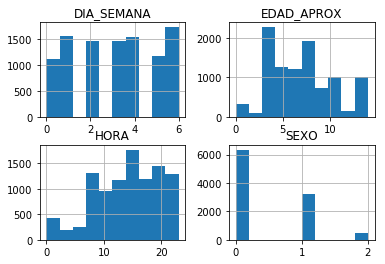

In [93]:
df_accs_lab_sample.drop(['DISTRITO'],1).hist()

plt.show()

In [94]:
df_accs_lab_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


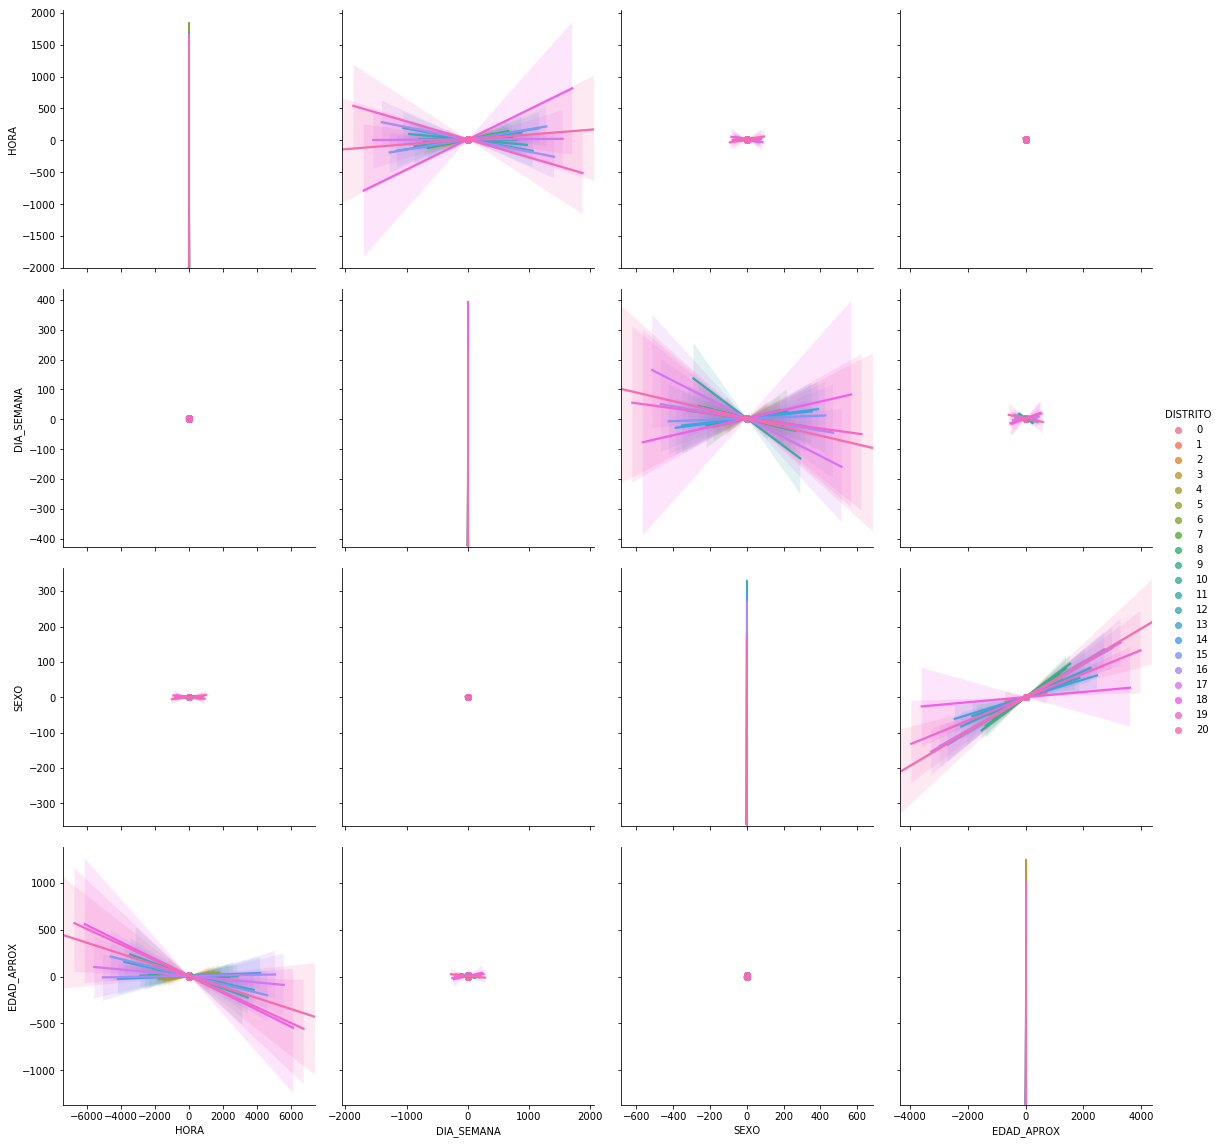

In [95]:
# Y también podemos ver la interrelación mediante el gráfico de pares (matriz de diagrama de dispersión)
# Nos permite ver tanto la distribución de variables individuales como las relaciones entre dos variables.
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',height=4,vars=['HORA', 'DIA_SEMANA', \
       'SEXO', 'EDAD_APROX'],kind='reg')

In [96]:
df_accs_lab_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

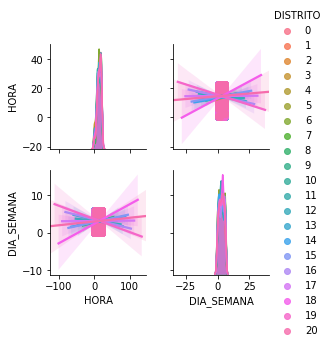

In [97]:
# Y también podemos ver la interrelación mediante el gráfico de pares (matriz de diagrama de dispersión)
# Nos permite ver tanto la distribución de variables individuales como las relaciones entre dos variables.
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',height=2,vars=['HORA', 'DIA_SEMANA'],kind='reg')

In [98]:
# Tenemos cargado:
# Cargamos variables con datos de muestra
#X = np.array(df_accs_lab_ohe_sample.drop('DISTRITO', 1))
#y = np.array(df_accs_lab_ohe_sample["DISTRITO"])
#X.shape

In [99]:
# Mirar datos mapeados

In [100]:
df_accs_lab_ohe_sample.groupby(['DISTRITO'], as_index=False).agg(['count'])

,HORA,DIA_SEMANA,SEXO,EDAD_APROX
,count,count,count,count
DISTRITO,,,,
0,491,491,491,491
1,112,112,112,112
2,614,614,614,614
3,650,650,650,650
4,762,762,762,762
5,570,570,570,570
6,613,613,613,613
7,543,543,543,543


In [101]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,11:00,VIERNES,4,HOMBRE,50


In [102]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [103]:
df_accs_lab_ohe['HORA']= lab.fit_transform(df_accs_lab_ohe['HORA'])
df_accs_lab_ohe['DIA_SEMANA']= lab.fit_transform(df_accs_lab_ohe['DIA_SEMANA'])
#df_accs_lab_ohe['DISTRITO']= lab.fit_transform(df_accs_lab_ohe['DISTRITO'])
df_accs_lab_ohe['SEXO']= lab.fit_transform(df_accs_lab_ohe['SEXO'])
df_accs_lab_ohe['EDAD_APROX']= lab.fit_transform(df_accs_lab_ohe['EDAD_APROX'])

In [104]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,0,6,CHAMARTIN,0,3


In [105]:
# Cargamos variables con datos de muestra
X = np.array(df_accs_lab_ohe.drop('DISTRITO', 1))
y = np.array(df_accs_lab_ohe["DISTRITO"])
X.shape

(252998, 4)

In [106]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [107]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [109]:
df_accs_lab_ohe.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [110]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,0,6,CHAMARTIN,0,3


In [111]:
df_accs_lab_ohe.shape

(252998, 5)

In [112]:
df_accs_lab_ohe.isnull().sum()

HORA          0
DIA_SEMANA    0
DISTRITO      0
SEXO          0
EDAD_APROX    0
dtype: int64

In [113]:
# Create the encoder.
encoder = OneHotEncoder(handle_unknown='ignore')

# Assume for simplicity all features are categorical.
encoder.fit(X_train)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [114]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [115]:
X.shape

(252998, 4)

In [116]:
X_train

<202398x49 sparse matrix of type '<class 'numpy.float64'>'
	with 809592 stored elements in Compressed Sparse Row format>

In [117]:
X_test

<50600x49 sparse matrix of type '<class 'numpy.float64'>'
	with 202400 stored elements in Compressed Sparse Row format>

### Regresión Logística con SKLearn

In [118]:
# Creamos el Modelo de Regresión Logística y 
# hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag', verbose=0)
model_LOGREG.fit(X_train,y_train)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
# Clasificamos todo nuestro conjunto de entradas X utilizando el método «predict(X)» para el modelo
# y revisamos algunas de sus salidas para comprobar si coincide con las salidas reales de nuestro origen
predictions_LOGREG = model_LOGREG.predict(X_test)

In [120]:
print(predictions_LOGREG[22])

CENTRO


In [121]:
type(predictions_LOGREG)

numpy.ndarray

In [122]:
predictions_LOGREG.dtype

dtype('O')

In [123]:
predictions_LOGREG.shape

(50600,)

In [124]:
print(accuracy_score(y_test, predictions_LOGREG))

0.08677865612648221


In [125]:
# Calidad de nuestro modelo, nos devuelve la precisión media de las predicciones
model_LOGREG.score(X_test,y_test)

0.08677865612648221

### AÑADIMOS NUEVAS VARIABLES PARA INTENTAR MEJORAR EL MODELO

In [126]:
!ls -ltr {folder}/distri*

-rw-rw-r-- 1 dsc dsc 1164 nov 22 17:41 /home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo/distritos_municipio_madrid.csv


In [127]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [128]:
!ls -ltr distritos_municipio_madrid.csv

-rw-rw-r-- 1 dsc dsc 1164 nov 22 17:41 distritos_municipio_madrid.csv


In [129]:
df_distritos = pd.read_csv("distritos_municipio_madrid.csv", sep=';', encoding='latin-1')

In [130]:
df_distritos.columns

Index(['distrito_codigo', 'distrito_nombre', 'municipio_codigo',
       'municipio_nombre', 'superficie_km2', 'densidad_por_km2'],
      dtype='object')

In [131]:
df_distritos.head(3)

,distrito_codigo,distrito_nombre,municipio_codigo,municipio_nombre,superficie_km2,densidad_por_km2
0,79601,Centro,796,Madrid,5.21,25340.69
1,79602,Arganzuela,796,Madrid,6.52,23306.44
2,79603,Retiro,796,Madrid,5.42,21867.53


In [132]:
drop_elements = ['municipio_codigo', 'municipio_nombre']
df_distritos_lab = df_distritos.drop(drop_elements, axis = 1)

In [133]:
df_distritos_lab.columns

Index(['distrito_codigo', 'distrito_nombre', 'superficie_km2',
       'densidad_por_km2'],
      dtype='object')

In [134]:
df_distritos_lab.head(3)

,distrito_codigo,distrito_nombre,superficie_km2,densidad_por_km2
0,79601,Centro,5.21,25340.69
1,79602,Arganzuela,6.52,23306.44
2,79603,Retiro,5.42,21867.53


In [135]:
df_distritos_lab.dtypes

distrito_codigo       int64
distrito_nombre      object
superficie_km2      float64
densidad_por_km2    float64
dtype: object

In [136]:
df_distritos_lab.shape

(21, 4)

In [137]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [138]:
df_distritos_lab = df_distritos_lab.rename(columns = {'distrito_nombre':'DISTRITO'})

In [139]:
df_distritos_lab.head()

,distrito_codigo,DISTRITO,superficie_km2,densidad_por_km2
0,79601,Centro,5.21,25340.69
1,79602,Arganzuela,6.52,23306.44
2,79603,Retiro,5.42,21867.53
3,79604,Salamanca,5.36,26830.78
4,79605,Chamartín,9.12,15723.25


In [140]:
df_accs.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20
1,00:00,VIERNES,CHAMARTIN,HOMBRE,50
2,00:00,VIERNES,CHAMARTIN,MUJER,40


In [141]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [142]:
df_distritos_lab['DISTRITO'].unique()

array(['    Centro ', '    Arganzuela ', '    Retiro ', '    Salamanca ',
       '    Chamartín ', '    Tetuan ', '    Chamberí ',
       '    Fuencarral-El Pardo ', '    Moncloa-Aravaca ', '    Latina ',
       '    Carabanchel ', '    Usera ', '    Puente de Vallecas ',
       '    Moratalaz ', '    Ciudad Lineal ', '    Hortaleza ',
       '    Villaverde ', '    Villa de Vallecas ', '    Vicálvaro ',
       '    San Blas-Canillejas ', '    Barajas '], dtype=object)

In [143]:
# strip leading and trailing space only strings
df_distritos_lab['DISTRITO'] = df_distritos_lab['DISTRITO'].str.strip()


In [144]:
df_distritos_lab['DISTRITO'].unique()

array(['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín',
       'Tetuan', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca',
       'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas',
       'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
       'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas'],
      dtype=object)

In [145]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [146]:
df_distritos_lab['DISTRITO'] = df_distritos_lab['DISTRITO'].str.upper()

In [147]:
df_distritos_lab['DISTRITO'].unique()

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN',
       'TETUAN', 'CHAMBERÍ', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA',
       'LATINA', 'CARABANCHEL', 'USERA', 'PUENTE DE VALLECAS',
       'MORATALAZ', 'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE',
       'VILLA DE VALLECAS', 'VICÁLVARO', 'SAN BLAS-CANILLEJAS', 'BARAJAS'],
      dtype=object)

In [148]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [149]:
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"CHAMARTÍN":"CHAMARTIN"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"CHAMBERÍ":"CHAMBERI"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"VICÁLVARO":"VICALVARO"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"SAN BLAS-CANILLEJAS":"SAN BLAS"}, regex=True)

In [150]:
df_distritos_lab['DISTRITO'].unique()

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTIN',
       'TETUAN', 'CHAMBERI', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA',
       'LATINA', 'CARABANCHEL', 'USERA', 'PUENTE DE VALLECAS',
       'MORATALAZ', 'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE',
       'VILLA DE VALLECAS', 'VICALVARO', 'SAN BLAS', 'BARAJAS'],
      dtype=object)

In [151]:
df_distritos_lab.columns

Index(['distrito_codigo', 'DISTRITO', 'superficie_km2', 'densidad_por_km2'], dtype='object')

In [152]:
df_distritos_lab['distrito_codigo'].unique()

array([79601, 79602, 79603, 79604, 79605, 79606, 79607, 79608, 79609,
       79610, 79611, 79612, 79613, 79614, 79615, 79616, 79617, 79618,
       79619, 79620, 79621])

In [153]:
df_distritos_lab['superficie_km2'].unique()

array([  5.21,   6.52,   5.42,   5.36,   9.12,   5.37,   4.73, 238.  ,
        46.47,  25.47,  14.1 ,   7.7 ,  14.84,   6.08,  11.52,  25.87,
        20.21,  51.49,  35.36,  22.26,  43.56])

In [154]:
df_distritos_lab['densidad_por_km2'].unique()

array([25340.69, 23306.44, 21867.53, 26830.78, 15723.25, 28664.25,
       29049.26,  1003.  ,  2515.26,  9183.75, 17316.88, 17535.32,
       15345.01, 15493.59, 18455.56,  6973.33,  7059.13,  2026.82,
        1981.11,  6934.37,  1076.06])

In [155]:
# Comprobar valores nulos
df_distritos_lab.isnull().sum()

distrito_codigo     0
DISTRITO            0
superficie_km2      0
densidad_por_km2    0
dtype: int64

In [156]:
from functools import reduce
df_accs_join_dist = [df_accs_lab_ohe, df_distritos_lab]
df_accs_join_dist = reduce(lambda left,right: pd.merge(left,right, on=['DISTRITO']), df_accs_join_dist)
df_accs_join_dist

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX,distrito_codigo,superficie_km2,densidad_por_km2
0,0,6,CHAMARTIN,0,3,79605,9.12,15723.25
1,0,6,CHAMARTIN,0,9,79605,9.12,15723.25
2,0,6,CHAMARTIN,1,7,79605,9.12,15723.25
3,20,0,CHAMARTIN,2,14,79605,9.12,15723.25
4,20,0,CHAMARTIN,0,8,79605,9.12,15723.25
...,...,...,...,...,...,...,...,...
252993,16,0,CENTRO,0,9,79601,5.21,25340.69
252994,21,2,CENTRO,0,9,79601,5.21,25340.69
252995,21,2,CENTRO,0,5,79601,5.21,25340.69
252996,21,2,CENTRO,1,4,79601,5.21,25340.69


In [157]:
df_accs_join_dist.shape

(252998, 8)

In [158]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX',
       'distrito_codigo', 'superficie_km2', 'densidad_por_km2'],
      dtype='object')

In [159]:
df_accs_join_dist = df_accs_join_dist.rename(columns = {'distrito_codigo':'COD_DISTRITO'})
df_accs_join_dist = df_accs_join_dist.rename(columns = {'superficie_km2':'SUP_KM2'})
df_accs_join_dist = df_accs_join_dist.rename(columns = {'densidad_por_km2':'DENSIDAD_KM2'})

In [160]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [161]:
df_accs_join_dist["COD_DISTRITO"].unique()

array([79605, 79613, 79607, 79603, 79604, 79611, 79615, 79609, 79606,
       79618, 79614, 79602, 79620, 79617, 79616, 79608, 79619, 79612,
       79610, 79621, 79601])

In [162]:
df_accs_join_dist["SUP_KM2"].unique()

array([  9.12,  14.84,   4.73,   5.42,   5.36,  14.1 ,  11.52,  46.47,
         5.37,  51.49,   6.08,   6.52,  22.26,  20.21,  25.87, 238.  ,
        35.36,   7.7 ,  25.47,  43.56,   5.21])

In [163]:
df_accs_join_dist["DENSIDAD_KM2"].unique()

array([15723.25, 15345.01, 29049.26, 21867.53, 26830.78, 17316.88,
       18455.56,  2515.26, 28664.25,  2026.82, 15493.59, 23306.44,
        6934.37,  7059.13,  6973.33,  1003.  ,  1981.11, 17535.32,
        9183.75,  1076.06, 25340.69])

In [164]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [165]:
df_inf_xa_dis = df_accs_join_dist.reset_index(drop=True).copy()

In [166]:
df_inf_xa_dis.dtypes

HORA              int64
DIA_SEMANA        int64
DISTRITO         object
SEXO              int64
EDAD_APROX        int64
COD_DISTRITO      int64
SUP_KM2         float64
DENSIDAD_KM2    float64
dtype: object

In [167]:
# Convertir a object las columnas numéricas
df_inf_xa_dis["COD_DISTRITO"]=df_inf_xa_dis['COD_DISTRITO'].astype(np.str)
df_inf_xa_dis["SUP_KM2"]=df_inf_xa_dis['SUP_KM2'].astype(np.str)
df_inf_xa_dis["DENSIDAD_KM2"]=df_inf_xa_dis['DENSIDAD_KM2'].astype(np.str)

In [168]:
df_inf_xa_dis.dtypes

HORA             int64
DIA_SEMANA       int64
DISTRITO        object
SEXO             int64
EDAD_APROX       int64
COD_DISTRITO    object
SUP_KM2         object
DENSIDAD_KM2    object
dtype: object

In [169]:
df_inf_xa_dis.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [170]:
# Cargamos variables.
X = np.array(df_inf_xa_dis.drop(['DISTRITO'],1))
y = np.array(df_inf_xa_dis['DISTRITO'])
X.shape


# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [171]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X_train)    

# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)



In [172]:
X.shape

(252998, 7)

In [173]:
X[0]

array([0, 6, 0, 3, '79605', '9.12', '15723.25'], dtype=object)

In [174]:
X_train

<202398x112 sparse matrix of type '<class 'numpy.float64'>'
	with 1416786 stored elements in Compressed Sparse Row format>

In [175]:
X_test

<50600x112 sparse matrix of type '<class 'numpy.float64'>'
	with 354200 stored elements in Compressed Sparse Row format>

### Regresión Logística con SKLearn (2)

In [176]:
# Creamos el Modelo de Regresión Logística y 
# hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag')
model_LOGREG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
# Clasificamos todo nuestro conjunto de entradas X utilizando el método «predict(X)» para el modelo
# y revisamos algunas de sus salidas para comprobar si coincide con las salidas reales de nuestro origen
predictions_LOGREG = model_LOGREG.predict(X_test)

In [178]:
print(predictions_LOGREG[22])

CENTRO


In [179]:
type(predictions_LOGREG)

numpy.ndarray

In [180]:
predictions_LOGREG.dtype

dtype('O')

In [181]:
predictions_LOGREG.shape

(50600,)

In [182]:
print(accuracy_score(y_test, predictions_LOGREG))

1.0


In [183]:
# Calidad de nuestro modelo, nos devuelve la precisión media de las predicciones
model_LOGREG.score(X_test,y_test)

1.0

In [184]:
y_test.dtype

dtype('O')

In [185]:
len(y_test)

50600

In [186]:
y_test.shape

(50600,)

In [187]:
y_test[22,]

'CENTRO'

########################################################

##########################################

############################

## VALIDAR MODELO

In [188]:
df_inf_xa_dis.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [189]:
df_inf_xa_dis.dtypes

HORA             int64
DIA_SEMANA       int64
DISTRITO        object
SEXO             int64
EDAD_APROX       int64
COD_DISTRITO    object
SUP_KM2         object
DENSIDAD_KM2    object
dtype: object

In [190]:
df_inf_xa_dis.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX,COD_DISTRITO,SUP_KM2,DENSIDAD_KM2
0,0,6,CHAMARTIN,0,3,79605,9.12,15723.25


In [191]:
# Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% 
# de los datos de entrada y calculamos el nuevo scoring
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_LOGREG, X_train, y_train, cv=kfold, \
                                             scoring='accuracy', error_score=np.nan, verbose=0)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 1.000000 (0.000000)


In [192]:
# Y ahora hacemos las predicciones (en realidad clasificación) utilizando nuestro «cross validation set»
# es decir del subconjunto que habíamos apartado. 
# Aciertos: xxx %
predictions_LOGREG = model_LOGREG.predict(X_test)
print(accuracy_score(y_test, predictions_LOGREG))

1.0


# Resultados del modelo

In [193]:
## Matrix de confusión para los errores
print(confusion_matrix(y_test, predictions_LOGREG))

[[2662    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0  704    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0 3081    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0 3604    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0 3840    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0 2811    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3248    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2779    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1704    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    

In [194]:
## Informe de clasificación con nuestro conjunto de TEST
# Observamos el promedio de F1-score
print(classification_report(y_test, predictions_LOGREG))

                     precision    recall  f1-score   support

         ARGANZUELA       1.00      1.00      1.00      2662
            BARAJAS       1.00      1.00      1.00       704
        CARABANCHEL       1.00      1.00      1.00      3081
             CENTRO       1.00      1.00      1.00      3604
          CHAMARTIN       1.00      1.00      1.00      3840
           CHAMBERI       1.00      1.00      1.00      2811
      CIUDAD LINEAL       1.00      1.00      1.00      3248
FUENCARRAL-EL PARDO       1.00      1.00      1.00      2779
          HORTALEZA       1.00      1.00      1.00      1704
             LATINA       1.00      1.00      1.00      2375
    MONCLOA-ARAVACA       1.00      1.00      1.00      2771
          MORATALAZ       1.00      1.00      1.00      1213
 PUENTE DE VALLECAS       1.00      1.00      1.00      3223
             RETIRO       1.00      1.00      1.00      2749
          SALAMANCA       1.00      1.00      1.00      3882
           SAN BLAS    

# Clasificación (o predicción) de nuevos valores

In [195]:
df_inf_xa_dis.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [196]:
df_inf_xa_dis.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX,COD_DISTRITO,SUP_KM2,DENSIDAD_KM2
0,0,6,CHAMARTIN,0,3,79605,9.12,15723.25


In [197]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [198]:
model_LOGREG.predict_log_proba(X_test)

array([[-1.12931338e+01, -1.13715495e+01, -1.13071721e+01, ...,
        -1.13705023e+01, -1.13959074e+01, -1.14120579e+01],
       [-1.05869208e+01, -1.07217164e+01, -1.05911985e+01, ...,
        -1.07312648e+01, -1.06233217e+01, -1.06937049e+01],
       [-1.13186785e+01, -1.12977308e+01, -1.12889030e+01, ...,
        -1.13044207e+01, -1.13111839e+01, -1.13020783e+01],
       ...,
       [-1.13394821e+01, -1.13976705e+01, -1.13708761e+01, ...,
        -1.14434203e+01, -1.14095185e+01, -1.14234650e+01],
       [-1.10795492e+01, -1.11463692e+01, -1.11044204e+01, ...,
        -1.11067817e+01, -1.10950713e+01, -1.11117083e+01],
       [-1.03999086e+01, -1.04942588e+01, -1.04064388e+01, ...,
        -1.04831684e+01, -1.04592524e+01, -6.09060377e-04]])

In [199]:
model_LOGREG.coef_

array([[-6.45860178e-04,  2.06549841e-03, -7.27986648e-04, ...,
        -1.68470893e-01, -1.65724300e-01, -1.73936118e-01],
       [-2.27769016e-02, -3.83157079e-02, -7.19306847e-03, ...,
        -1.60091571e-01, -1.56945252e-01, -1.64928581e-01],
       [ 2.11189877e-02,  2.36901636e-02,  9.21177805e-03, ...,
        -1.70424524e-01, -1.68139835e-01, -1.76239264e-01],
       ...,
       [-3.04349286e-02, -1.65935515e-04, -3.60422272e-04, ...,
        -1.58870985e-01, -1.56154315e-01, -1.64055853e-01],
       [-3.87513199e-05, -1.15098697e-02, -1.11866498e-02, ...,
        -1.64875137e-01, -1.62182167e-01, -1.70094074e-01],
       [-5.12375656e-03, -3.40477106e-03, -1.25812392e-02, ...,
        -1.61318841e-01,  3.31818432e+00, -1.66719381e-01]])

In [200]:
model_LOGREG.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)>

In [201]:
df_inf_xa_dis.dtypes

HORA             int64
DIA_SEMANA       int64
DISTRITO        object
SEXO             int64
EDAD_APROX       int64
COD_DISTRITO    object
SUP_KM2         object
DENSIDAD_KM2    object
dtype: object

In [202]:
predictions_LOGREG[22]

'CENTRO'

In [203]:
y_test[22]

'CENTRO'

In [206]:
model_LOGREG.predict_proba(X_test)

array([[1.24581722e-05, 1.15185760e-05, 1.22845013e-05, ...,
        1.15306453e-05, 1.12413973e-05, 1.10613017e-05],
       [2.52440328e-05, 2.20606205e-05, 2.51362755e-05, ...,
        2.18509802e-05, 2.43416505e-05, 2.26873073e-05],
       [1.21439621e-05, 1.24010327e-05, 1.25109908e-05, ...,
        1.23183478e-05, 1.22353181e-05, 1.23472358e-05],
       ...,
       [1.18939335e-05, 1.12215946e-05, 1.15263350e-05, ...,
        1.07197765e-05, 1.10894260e-05, 1.09358404e-05],
       [1.54245649e-05, 1.44275762e-05, 1.50456683e-05, ...,
        1.50101833e-05, 1.51869911e-05, 1.49364160e-05],
       [3.04352658e-05, 2.76949951e-05, 3.02371629e-05, ...,
        2.80038541e-05, 2.86816666e-05, 9.99391125e-01]])

In [208]:
model_LOGREG.predict_proba(X_test)[:,1]

[1.15185760e-05 2.20606205e-05 1.24010327e-05 ... 1.12215946e-05
 1.44275762e-05 2.76949951e-05]


In [210]:
model_LOGREG.decision_function(X_test)

array([[-0.48645488, -0.56487065, -0.50049327, ..., -0.56382339,
        -0.58922853, -0.605379  ],
       [-0.45979332, -0.59458898, -0.46407108, ..., -0.60413735,
        -0.49619423, -0.56657751],
       [-0.59249312, -0.57154547, -0.5627177 , ..., -0.57823538,
        -0.58499852, -0.575893  ],
       ...,
       [-0.51251299, -0.57070146, -0.54390705, ..., -0.61645117,
        -0.58254942, -0.59649596],
       [-0.52013357, -0.58695354, -0.5450048 , ..., -0.54736607,
        -0.53565572, -0.55229267],
       [-0.49470462, -0.5890549 , -0.50123489, ..., -0.57796447,
        -0.55404849,  9.90459488]])

In [212]:
model_LOGREG.classes_

array(['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN',
       'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA',
       'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS',
       'RETIRO', 'SALAMANCA', 'SAN BLAS', 'TETUAN', 'USERA', 'VICALVARO',
       'VILLA DE VALLECAS', 'VILLAVERDE'], dtype=object)

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment
